## Transfer Matrix Method

### Task
Die Probe besteht aus 20 Lagen, von abwechselnd je (amorphem) Silizium und Siliziumdioxid (bitte selbst die Brechungsindizes für die zwei Materialien recherchieren bei einer Wellenlänge von ca. 1 µm).
Die Schichtdicken der einzelnen Lagen sind folgendermaßen: <br><br>

L1 (Si) = [1+sin(πp)](2/3)*a<br>
L2 (SiO2) = [1+sin(-0.25π)](1/3)*a<br>
L3 (Si) =  [1-sin(πp)](2/3)*a<br>
L4 (SiO2) = [1-sin(-0.25π)](1/3)*a<br>
L5 (Si) = [1+sin(πp)](2/3)*a<br>
L6 (SiO2) = [1+sin(-0.125π)](1/3)*a <br>
L7 (Si) =  [1-sin(πp)](2/3)*a<br>
L8 (SiO2) = [1-sin(-0.125π)](1/3)*a<br>
L9 (Si) = [1+sin(πp)](2/3)*a<br>
L10 (SiO2) = [1+sin(0π)](1/3)*a<br>
L11 (Si) =  [1-sin(πp)](2/3)*a<br>
L12 (SiO2) = [1-sin(0π)](1/3)*a<br>
L13 (Si) = [1+sin(πp)](2/3)*a<br>
L14 (SiO2) = [1+sin(0.125π)](1/3)*a<br>
L15 (Si) =  [1-sin(πp)](2/3)*a<br>
L16 (SiO2) = [1-sin(0.125π)](1/3)*a<br>
L17 (Si) = [1+sin(πp)](2/3)*a<br>
L18 (SiO2) = [1+sin(0.25π)](1/3)*a<br>
L19 (Si) =  [1-sin(πp)](2/3)*a<br>
L20 (SiO2) = [1-sin(0.25π)](1/3)*a<br>
<br><br>
a=175nm und p ist ein Parameter, der von -1 bis 1 in Schritten von 0.05 durchgefahren wird. Pro p sollte man ein Spektrum erhalten. Für den ersten Schritt könnt ihr p=0 setzen (und im zweiten Schritt dann p variieren).
Wir benötigen das Spektrum im Wellenlängenbereich von 900 bis 1700nm. Berechnet werden soll das Spektrum mithilfe der Transfermatrixmethode.

### Code

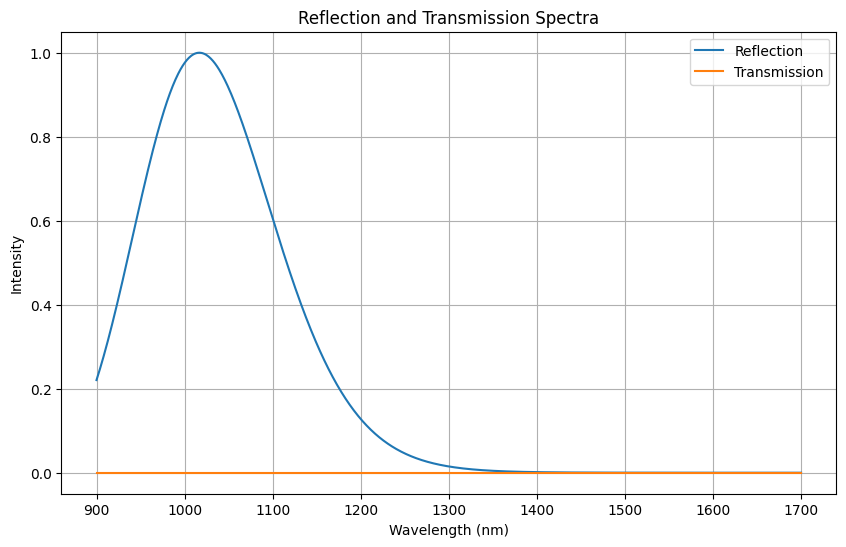

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
a = 175e-9  # base layer thickness in meters
p = 0  # layer thickness modulation value p

# Wavelength range from 900 nm to 1700 nm
wavelengths = np.linspace(900e-9, 1700e-9, 1000)

# Refractive indices
n_Si = 3.575
#Source: 
# 1) C. Schinke, P. C. Peest, J. Schmidt, R. Brendel, K. Bothe, M. R. Vogt, I. Kröger, S. Winter, A. Schirmacher, S. Lim, H. T. Nguyen, D. MacDonald. Uncertainty analysis for the coefficient of band-to-band absorption of crystalline silicon. AIP Advances 5, 67168 (2015)
# 2) M. R. Vogt. Development of physical models for the simulation of optical properties of solar cell modules, PhD. Thesis (2015)
n_SiO2 = 1.45
#Source:
#1) I. H. Malitson. Interspecimen comparison of the refractive index of fused silica, J. Opt. Soc. Am. 55, 1205-1208 (1965)
#2) C. Z. Tan. Determination of refractive index of silica glass for infrared wavelengths by IR spectroscopy, J. Non-Cryst. Solids 223, 158-163 (1998)


# Define layer widths
layers = [(1 + np.sin(np.pi * p)) * (2/3) * a,          #L1(Si)
        (1 + np.sin(-0.25 * np.pi)) * (1/3) * a,        #L2(SiO2)
        (1 - np.sin(np.pi * p)) * (2/3) * a,            #L3(Si)
        (1 - np.sin(-0.25 * np.pi)) * (1/3) * a,        #L4(SiO2)
        (1 + np.sin(np.pi * p)) * (2/3) * a,            #L5(Si)
        (1 + np.sin(-0.125 * np.pi)) * (1/3) * a,       #L6(SiO2)
        (1 - np.sin(np.pi * p)) * (2/3) * a,            #L7(Si)
        (1 - np.sin(-0.125 * np.pi)) * (1/3) * a,   	#L8(SiO2)
        (1 + np.sin(np.pi * p)) * (2/3) * a,            #L9(Si)
        (1 + np.sin(0 * np.pi)) * (1/3) * a,            #L10(SiO2)
        (1 - np.sin(np.pi * p)) * (2/3) * a,            #L11(Si)
        (1 - np.sin(0 * np.pi)) * (1/3) * a,            #L12(SiO2)
        (1 + np.sin(np.pi * p)) * (2/3) * a,            #L13(Si)
        (1 + np.sin(0.125 * np.pi)) * (1/3) * a,        #L14(SiO2)
        (1 - np.sin(np.pi * p)) * (2/3) * a,            #L15(Si)
        (1 - np.sin(0.125 * np.pi)) * (1/3) * a,    	#L16(SiO2)
        (1 + np.sin(np.pi * p)) * (2/3) * a,            #L17(Si)
        (1 + np.sin(0.25 * np.pi)) * (1/3) * a,         #L18(SiO2)
        (1 - np.sin(np.pi * p)) * (2/3) * a,            #L19(Si)
        (1 - np.sin(0.25 * np.pi)) * (1/3) * a,     	#L20(SiO2)
        ]

# Create array with refractive indices of layers    
refractive_indices = [n_Si if i % 2 == 0 else n_SiO2 for i in range(20)]

# Calculate Transfer Matrix
def transfer_matrix(wavelength, layers, refractive_indices):
    k0 = 2 * np.pi / wavelength

    # Initialize M with with first vacuum interface matrix
    M = np.array([[refractive_indices[0] + 1, refractive_indices[0] - 1], [refractive_indices[0] -1, refractive_indices[0] + 1]])


    for i in range(len(layers)):
        n = refractive_indices[i]
        d = layers[i]
        phi = k0 * n * d
        M_layer = np.array([[np.exp(1j*phi),  0], [0, np.exp(-1j*phi)]], dtype=complex)

        # Set refractive index after last layer to 1
        if i+1 == len(layers):
            M_interface = np.array([[1 + refractive_indices[i], 1 - refractive_indices[i]], [1 + refractive_indices[i], 1 + refractive_indices[i]]])
        else:
            M_interface = np.array([[refractive_indices[i] + refractive_indices[i], refractive_indices[i+1] - refractive_indices[i]], [refractive_indices[i+1] + refractive_indices[i], refractive_indices[i+1] + refractive_indices[i]]])
        M = M_interface @ M_layer @ M

    return M

# Calculate S Matrix
def s_matrix(wavelengths, layers, refractive_indices):
    M = transfer_matrix(wavelengths, layers, refractive_indices)
    S = np.array([[M[0,0] * M[1,1] - M[0,1] * M[1,0], M[0,1]], [- M[1,0], 1]])
    return S

# Calculate reflection and transmission
def reflection_transmission(wavelengths, layers, indices):
    R = np.zeros_like(wavelengths)
    T = np.zeros_like(wavelengths)
    for i, wl in enumerate(wavelengths):
        S = s_matrix(wl, layers, indices)
        r = S[1,0] / S[0,0]
        t = 1 / S[0,0]
        R[i] = np.abs(r)**2
        T[i] = np.abs(t)**2
        R_normalized = R / max(R)
        T_normalized = T / max(R)
    return R_normalized, T_normalized

# Compute reflection and transmission spectra
R, T = reflection_transmission(wavelengths, layers, refractive_indices)

# Plot the spectra
plt.figure(figsize=(10, 6))
plt.plot(wavelengths * 1e9, R, label='Reflection')
plt.plot(wavelengths * 1e9, T, label='Transmission')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Reflection and Transmission Spectra')
plt.legend()
plt.grid(True)
plt.show()
